In [ ]:
%matplotlib inline
!pip install contextily
!pip install geopandas
import pandas as pd
import geopandas
import contextily as ctx
from shapely.geometry import Point
import xyzservices.providers as xyz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
com=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/Com01012021_g')
pro=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/ProvCM01012021_g')
reg=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Limiti01012021_g/Reg01012021_g')
autostrade=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Autostrade_10000_CT10_line.zip')
autostrade

,TS_EID,COD_PE,PERCORSO,geometry
0,19.0,A21,AUTOSTRADA TORINO- PIACENZA- BRESCIA,"LINESTRING (496352.634 4981573.415, 496378.384..."
1,18.0,A21,AUTOSTRADA TORINO- PIACENZA- BRESCIA,"LINESTRING (580517.421 4994637.417, 580735.915..."
2,21.0,A21,AUTOSTRADA TORINO- PIACENZA- BRESCIA,"LINESTRING (580524.796 4994628.417, 580745.039..."
3,65.0,A50,TANGENZIALE OVEST DI MILANO,"LINESTRING (521699.514 5024872.823, 521630.139..."
4,62.0,A50,TANGENZIALE OVEST DI MILANO,"LINESTRING (504384.530 5044095.266, 504414.405..."
5,90.0,A51,TANGENZIALE EST DI MILANO,"LINESTRING (519364.775 5030574.241, 519401.151..."
6,78.0,A51,TANGENZIALE EST DI MILANO,"LINESTRING (519346.650 5030596.741, 519377.151..."
7,7.0,A1,AUTOSTRADA MILANO - ROMA,"LINESTRING (519364.775 5030574.241, 519352.525..."
8,8.0,A1,AUTOSTRADA MILANO - ROMA,"LINESTRING (519346.650 5030596.741, 519337.900..."
9,1922.0,A8,AUTOSTRADA MILANO- VARESE,"LINESTRING (485557.854 5069342.204, 485588.231..."


1. Visualizzare su una mappa i confini delle province lombarde e le autostrade. le autostrade devono essere in grigio e i confini delle province in nero. (2pt.)

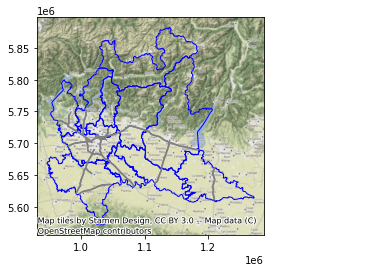

In [ ]:
pro_lo = pro[pro.within(reg[reg.DEN_REG=='Lombardia'].geometry.squeeze())]

ax= autostrade.to_crs(epsg=3857).plot(edgecolor='grey')
pro_lo.to_crs(epsg=3857).plot(facecolor='none',edgecolor='b', ax=ax)
ctx.add_basemap(ax)

2. visualizzare su una mappa le province attraversate da una certa autostrada inserita dall'utente. Controllare che l'autostrada sia effettivamente esistente: in caso contrario fornire un opportuno messaggio d'errore.
colorare le province in verde, facendo in modo che la mappa al di sotto risulti visibile(3pt)

AUTOSTRADA TORINO- PIACENZA- BRESCIA


/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


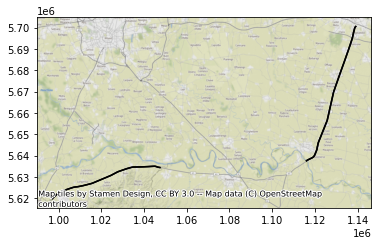

In [ ]:
user = input()
lst= list(autostrade['PERCORSO'])
if user not in lst:
  print('no')
else:
  auto_int= autostrade[autostrade.PERCORSO==user]
  auto_geo= pro[pro.intersects(auto_int.geometry.squeeze())]
  ax = auto_geo.to_crs(epsg=3857).plot(facecolor='g')
  auto_int.to_crs(epsg=3857).plot(ax=ax, facecolor='none', edgecolor='k')
  ctx.add_basemap(ax)

3. visualizzare tutti i comuni che si trovano ad una certa distanza da un'autostrada. l'utente inserisce il nome dell'autostrada e la distanza e il programma deve visualizzare una mappa con l'autostrada in nero e i comuni in rosso(trasparente)(2pt.)..

A21
727


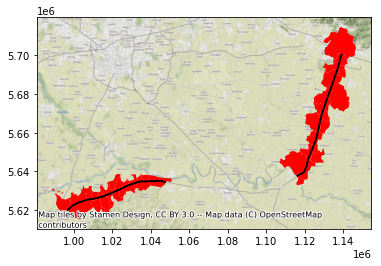

In [ ]:
comuni = com[com.within(reg[reg.DEN_REG.str.contains('Lombardia')].geometry.squeeze())]
user_auto = input()
distance= float(input())

ax= comuni[comuni.distance(autostrade[autostrade.COD_PE == user_auto].unary_union)<= distance].to_crs(epsg=3857).plot(facecolor='r')
autostrade[autostrade.COD_PE == user_auto].to_crs(epsg=3857).plot(color='k', ax=ax)
ctx.add_basemap(ax)

4. visualizzare su una mappa i parchi lombardi che non sono attravesati da nessuna autostrada(2pt.)..

In [ ]:
parchi= geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas-tutorial-master/Parchi_regionali_e_nazionali_polygon.zip')

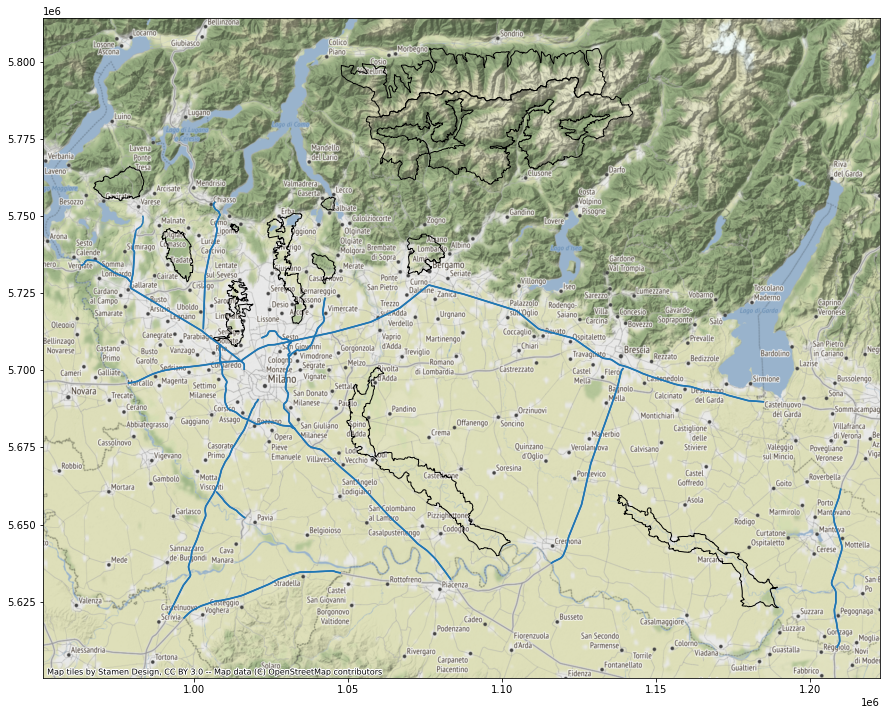

In [ ]:
parchi_lo = parchi[parchi.within(reg[reg.DEN_REG=='Lombardia'].geometry.squeeze())]

parchi_f = parchi_lo[parchi_lo.intersects(autostrade.unary_union)]

copia_parchi_f= parchi_f

parchi_nonatt = parchi_lo.drop(parchi_f.index)

ax = parchi_nonatt.to_crs(epsg=3857).plot(figsize = (15,15), facecolor = "none", Edgecolor = "k")
autostrade.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)